In [294]:
import robin_stocks as r 
import pandas as pd
import time

### Setting up Robinhood

In [238]:
username = ''
password = ''

login = r.login(username,password)

In [239]:
r.build_holdings()

{'KMI': {'price': '14.200000',
  'quantity': '1.00000000',
  'average_buy_price': '0.0000',
  'equity': '14.20',
  'percent_change': '0.00',
  'equity_change': '14.200000',
  'type': 'stock',
  'name': 'Kinder Morgan',
  'id': '346c3dc3-2ef4-470f-aa67-0471cffeb299',
  'pe_ratio': '14.542600',
  'percentage': '100.00'}}

### Historical Visualization

In [309]:
def extract_list():
    ticker_list = list(r.build_holdings().keys())
    return ticker_list

def visualize_price(ticker_list, span = 'year', bounds = 'regular'):    
    for t in range(len(ticker_list)):
        name = str(r.get_name_by_symbol(ticker_list[t]))
        hist = r.stocks.get_historicals(ticker_list[t], span=span, bounds=bounds)
        hist_df = pd.DataFrame()
        for i in range(len(hist)):
            df = pd.DataFrame(hist[i], index = [i])
            hist_df = pd.concat([hist_df,df])
        hist_df.begins_at = pd.to_datetime(hist_df.begins_at, infer_datetime_format=True)
        hist_df.open_price = hist_df.open_price.astype('float32')
        hist_df.close_price = hist_df.close_price.astype('float32')
        hist_df.high_price = hist_df.high_price.astype('float32')
        hist_df.low_price = hist_df.low_price.astype('float32')

        ax = hist_df.plot(x = 'begins_at', y = 'open_price', figsize = (16,8))
        ax.fill_between(hist_df.begins_at, hist_df.low_price, hist_df.high_price, alpha=0.5)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price (USD)')
        ax.legend([ticker_list[t]])
        ax.set_title(name)

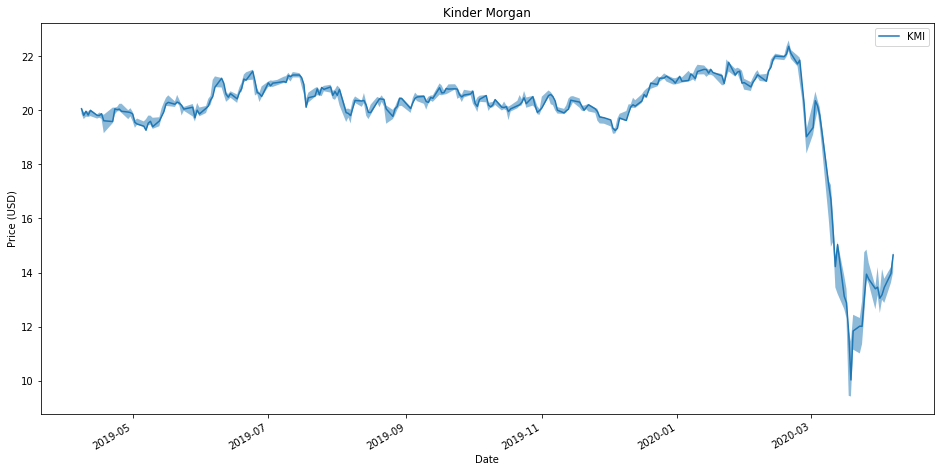

In [310]:
ticker_list = extract_list()
visualize_price(ticker_list, span = 'year', bounds = 'regular')

### Trading Bot

In [311]:
def trading_bot(trading_dict):
    holdings = r.build_holdings()
    holdings_df = pd.DataFrame()
    for i in range(len(holdings)):
        ticker = list(holdings.items())[i][0]
        holding_df = pd.DataFrame(list(holdings.items())[i][1], index = [i])
        holding_df['ticker'] = ticker
        holdings_df = pd.concat([holdings_df, holding_df])
    holdings_df = holdings_df[['ticker', 'price', 'quantity', 'percent_change','average_buy_price', 'equity', 'equity_change','pe_ratio', 'type', 'name', 'id' ]]

    for j in range(len(trading_dict)):
        holding_df = holdings_df[holdings_df.ticker == list(trading_dict.keys())[j]]
        if holding_df['percent_change'].astype('float32')[0] <= list(trading_dict.values())[j][0]:
            buy_string = 'Buying ' + str(holding_df['ticker'][0]) + ' at ' + time.ctime()
            print(buy_string)
            r.orders.order_buy_market(holding_df['ticker'][0],1,timeInForce= 'gfd')
        else:
            print('Nothing to buy')

        if holding_df['percent_change'].astype('float32')[0] >= list(trading_dict.values())[j][1]:
            sell_string = 'Buying ' + str(holding_df['ticker'][0]) + ' at ' + time.ctime()
            print(sell_string)
            r.orders.order_sell_market(holding_df['ticker'][0],1,timeInForce= 'gfd')
        else:
            print('Nothing to sell')    



In [312]:
trading_dict = {'KMI': [-0.50, 0.50]}
holdings_df = trading_bot(trading_dict)

Nothing to buy
Nothing to sell


In [313]:
r.logout()